In [1]:
import pymc3 as pm 
import numpy as np 
import pandas as pd 
import theano.tensor as tt
import seaborn as sns 
import scipy.stats as stats 
from scipy.special import expit as logistic
import matplotlib.pyplot as plt 
import arviz as az

In [2]:
az.style.use('arviz-darkgrid')

In [3]:
iris = pd.read_csv('C:/Users/Talha/Downloads/iris.csv') 
iris.head()
x=iris['species'].values
y=iris['sepal_length'].values


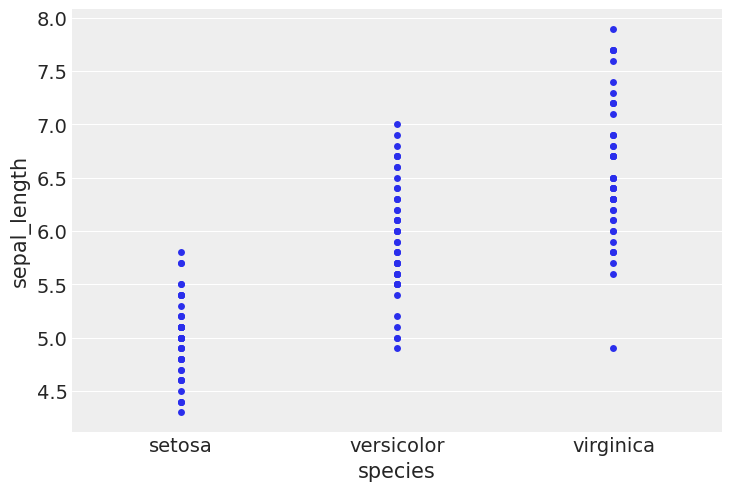

In [4]:
sns.stripplot(x="species", y="sepal_length", data=iris, jitter=False)
plt.savefig('B11197_04_02.png', dpi=300);

In [5]:
df = iris.query("species == ('setosa', 'versicolor')") 
y_0 = pd.Categorical(df['species']).codes 
y_0 
x_n = 'sepal_length' 
x_0 = df[x_n].values 
x_c = x_0 - x_0.mean() 


In [6]:
with pm.Model() as model_0: 
    α = pm.Normal('α', mu=0, sd=10) 
    β = pm.Normal('β', mu=0, sd=10)  
 
    μ = α + pm.math.dot(x_0, β) 
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ)) 
    bd = pm.Deterministic('bd', -α/β) 
    yl = pm.Bernoulli('yl', p=θ, observed=y_0) 
    idata_0 = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 42 seconds.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
The number of effective samples is smaller than 25% for some parameters.


In [17]:
with pm.Model() as lda:
    μ = pm.Normal('μ', mu=0, sd=10, shape=2)
    σ = pm.HalfNormal('σ', 10)
    setosa = pm.Normal('setosa', mu=μ[0], sd=σ, observed=x_0[:50])
    versicolor = pm.Normal('versicolor', mu=μ[1], sd=σ, observed=x_0[50:])
    bd = pm.Deterministic('bd', (μ[0] + μ[1]) / 2)
    trace_lda = pm.sample(1000)


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 37 seconds.


In [9]:
df=az.summary(idata_lda)
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ[0],5.006,0.063,4.887,5.121,0.001,0.001,2155.0,1453.0,1.0
μ[1],5.935,0.065,5.821,6.055,0.001,0.001,2499.0,1519.0,1.0
σ,0.448,0.033,0.389,0.508,0.001,0.000,2647.0,1436.0,1.0
bd,5.470,0.046,5.387,5.553,0.001,0.001,2372.0,1122.0,1.0


In [10]:
df.iloc[0][0]

5.006

In [11]:
df.iloc[1][0]

5.935

In [12]:
(df.iloc[0][0]+df.iloc[1][0])/2

5.4704999999999995

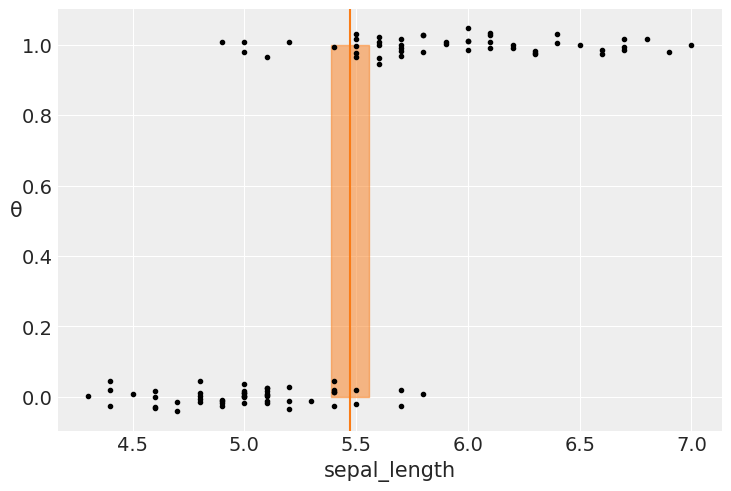

In [22]:
posterior_samples = trace_lda['bd']
plt.axvline(trace_lda['bd'].mean(), ymax=1, color='C1')
hdi_interval = az.hdi(posterior_samples, hdi_prob=0.95) 
plt.fill_betweenx([0, 1], hdi_interval[0], hdi_interval[1], color='C1', alpha=0.5)
plt.plot(x_0, np.random.normal(y_0, 0.02), '.', color='k')
plt.ylabel('θ', rotation=0)
plt.xlabel('sepal_length')
plt.savefig('B11197_04_09.png', dpi=300)


In [24]:
#--------------------------------------------------------------------------------------------------
#Activity 2
#--------------------------------------------------------------------------------------------------

In [27]:
n = 100
θ_real = 2.5
φ = 0.1
counts = np.array([(np.random.random() > (1-φ)) * np.random.poisson(θ_real) for i in range(n)])
counts

array([0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ, φ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 41 seconds.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


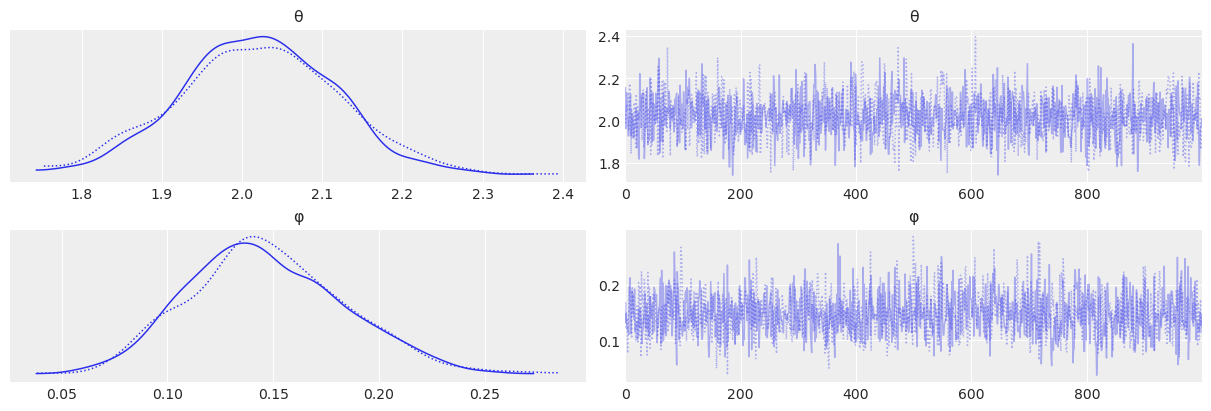

In [28]:
with pm.Model() as ZIP:
    φ = pm.Beta('φ', 1, 1)
    θ = pm.Normal('θ', 2, 0.1)
    y = pm.ZeroInflatedPoisson('y', φ, θ, observed=counts)
    idata = pm.sample(1000, return_inferencedata=True)


#---- Plotting ----

az.summary(idata)
az.plot_trace(idata)
plt.savefig('B11197_04_11.png', dpi=300);

In [29]:
#--------------------
# Fish csv Data
#--------------------

In [31]:
fish_data = pd.read_csv('C:/Users/Talha/Downloads/fish.csv')
fish_data.head(5)
fish_data['count'].value_counts()


count
0      142
1       31
2       20
3       12
5       10
4        6
6        4
7        3
21       2
9        2
8        2
15       2
32       2
22       1
149      1
29       1
14       1
11       1
31       1
13       1
65       1
30       1
16       1
10       1
38       1
Name: count, dtype: int64

In [49]:
with pm.Model() as ZIP_reg:
    ψ = pm.Beta('ψ', 1, 1)
    α = pm.Normal('α', 0, 10)
    β = pm.Normal('β', 0, 10, shape=2)
    θ = pm.math.exp(α + β[0] * fish_data['child'] + β[1] * fish_data['camper'])
    y1 = pm.ZeroInflatedPoisson('y1', ψ, θ, observed=fish_data['count'])
    idata_ZIP_reg = pm.sample(1000)
    
az.summary(idata_ZIP_reg)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α, ψ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 37 seconds.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,1.612,0.087,1.456,1.780,0.003,0.002,958.0,1219.0,1.0
β[0],-0.931,0.098,-1.120,-0.742,0.003,0.002,1362.0,1092.0,1.0
β[1],0.807,0.092,0.627,0.978,0.003,0.002,982.0,1065.0,1.0
ψ,0.484,0.036,0.418,0.553,0.001,0.001,1379.0,1243.0,1.0


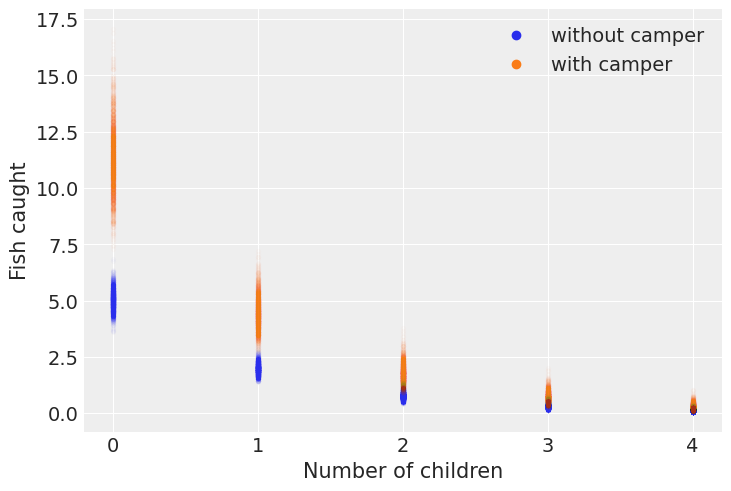

In [58]:
children = [0, 1, 2, 3, 4]
fish_count_pred_0 = []
fish_count_pred_1 = []
for n in children:
    without_camper = idata_ZIP_reg['α'] + idata_ZIP_reg['β'][:,0] * n 
    with_camper = without_camper + posterior_ZIP_reg['β'].values[1]
    fish_count_pred_0.append(np.exp(without_camper))
    fish_count_pred_1.append(np.exp(with_camper))
plt.plot(children, fish_count_pred_0, 'C0.', alpha=0.01)
plt.plot(children, fish_count_pred_1, 'C1.', alpha=0.01)
plt.xticks(children);
plt.xlabel('Number of children')
plt.ylabel('Fish caught')
plt.plot([], 'C0o', label='without camper')
plt.plot([], 'C1o', label='with camper')
plt.legend()
plt.savefig('B11197_04_12.png', dpi=300);

In [ ]:
#--------------------------
# Robus Iris Dataset
#--------------------------

In [60]:
iris = sns.load_dataset("iris")
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
y_0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

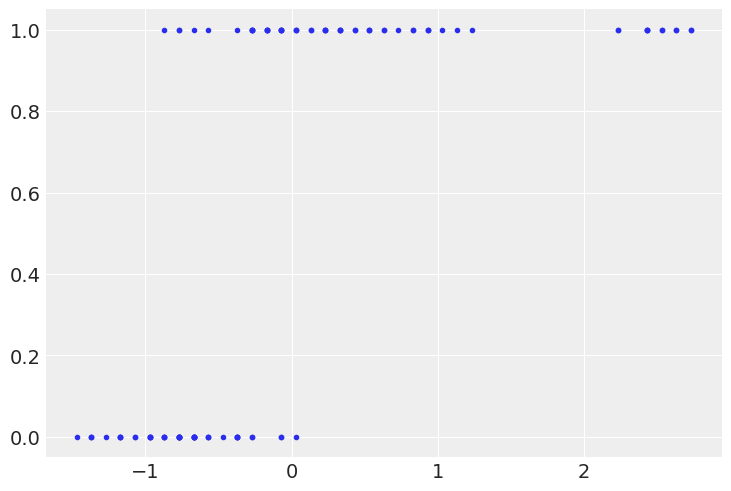

In [61]:
x_n = 'sepal_length'
x_0 = df[x_n].values
y_0 = np.concatenate((y_0, np.ones(12, dtype=int)))
# y_0 = np.concatenate((y_0, np.zeros(12, dtype=int)))
x_0 = np.concatenate((x_0, [8.2, 8.5, 8.0, 8.3, 8.2, 8.4,8.2, 8.5, 8.0,
8.3, 8.2, 8.4]))
x_c = x_0 - x_0.mean()
plt.plot(x_c, y_0, '.');

In [62]:
with pm.Model() as model_rlg:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    μ = α + x_c * β
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    π = pm.Beta('π', 1., 1.)
    p = π * 0.5 + (1 - π) * θ
    yl = pm.Bernoulli('yl', p=p, observed=y_0)
    idata_rlg = pm.sample(1000, target_accept=0.95)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [π, β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 39 seconds.
The number of effective samples is smaller than 25% for some parameters.


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,2.690,1.305,0.828,5.301,0.108,0.077,224.0,279.0,1.02
β,8.156,4.118,3.551,17.279,0.364,0.258,202.0,216.0,1.02
bd,-0.337,0.063,-0.454,-0.219,0.002,0.001,1435.0,1377.0,1.00
π,0.084,0.068,0.000,0.208,0.004,0.003,254.0,482.0,1.01


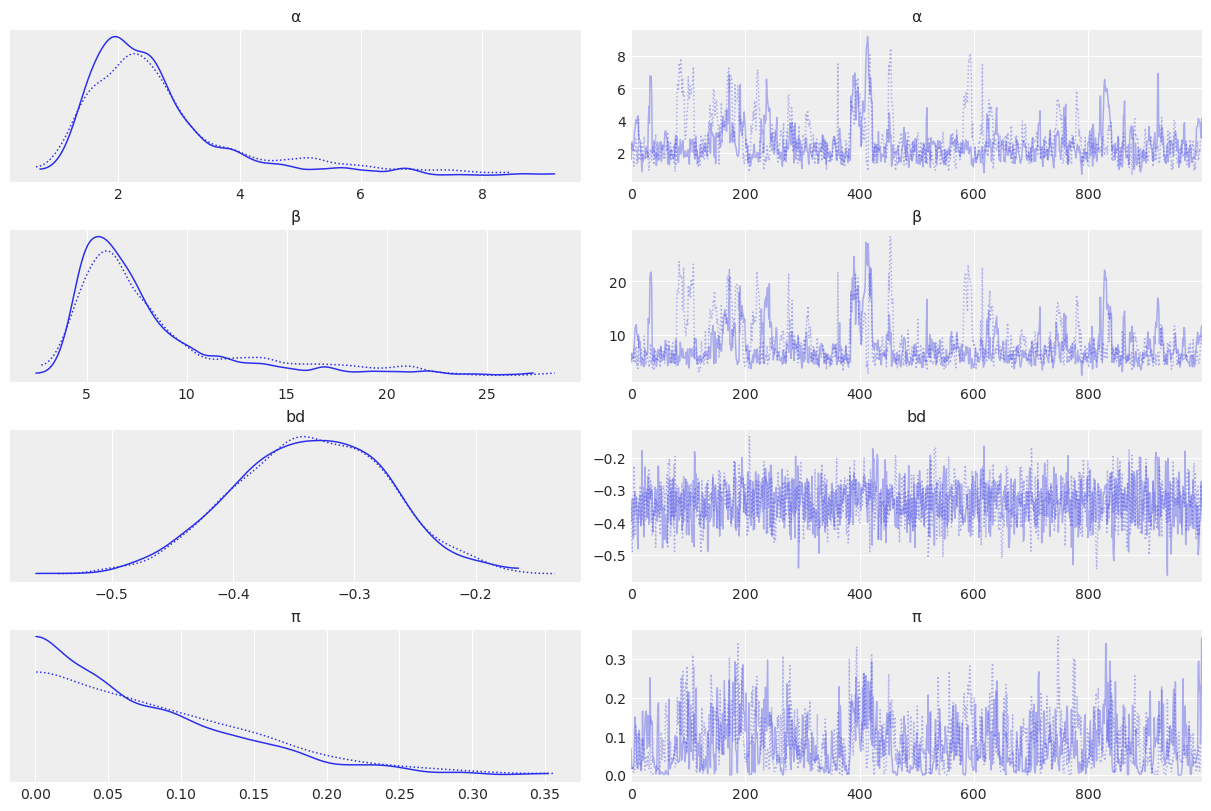

In [63]:
varnames = ['α', 'β', 'bd','π']
az.plot_trace(idata_rlg, varnames);
az.summary(idata_rlg, varnames)